### 머신러닝 맛보기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib import font_manager, rc
import platform

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False

In [35]:
# 데이터 준비하기
    # - 도미, 빙어 데이터
    # - 2차원 데이터 만들기

In [4]:
# 데이터 가지고 오기

# 1. 도미 데이터
# 도미 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 
                30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 
                33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 
                39.5, 41.0, 41.0]
# 도미 무게
brean_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 
                390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 
                600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 
                685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 
                850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

print('도미 길이 :', bream_length)
print('-------------------------------------------------------------------------------------------------------------------------')
print('도미 무게 :', brean_weight)
print()
print(len(bream_length), len(brean_weight))

도미 길이 : [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
-------------------------------------------------------------------------------------------------------------------------
도미 무게 : [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

35 35


In [5]:
# 데이터 가지고 오기

# 2. 빙어 데이터
# 빙어 길이
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

# 빙어 무게
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

print('도미 길이 :', smelt_length)
print('-------------------------------------------------------------------------------------------------------------------------')
print('도미 무게 :', smelt_weight)
print()
print(len(smelt_length), len(smelt_weight))

도미 길이 : [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
-------------------------------------------------------------------------------------------------------------------------
도미 무게 : [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

14 14


In [10]:
lenght = bream_length + smelt_length
weight = brean_weight + smelt_weight

In [13]:
fish_data = [[leng, wei] for leng, wei in zip(lenght,weight)] 

In [15]:
len(fish_data)

49

In [16]:
fish_target = [1]*35 + [0]*14

In [18]:
len(fish_target)

49

### numpy를 이용한 2차원 데이터 생성
#### - tuple 형태로 생성

In [25]:
a = [1,2,3]
b = [4,5,6]
np.column_stack((a,b))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [22]:
fish_data = np.column_stack((lenght,weight))

In [24]:
len(fish_data)

49

In [33]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))

In [35]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### 훈련데이터세트, 테스트데이터세트 생성
- 훈련데이터세트 : 독립변수 train_data, train_target 데이터생성
- 테스트데이터세트 : 독립변수 test_data, test_target 데이터생성

#### numpy로 셔플하기

In [56]:
np.random.seed(42)
index_arr = np.arange(49)
np.random.shuffle(index_arr)

In [57]:
index_arr

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2, 37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [58]:
train_data = fish_data[index_arr[:35]]
train_target = fish_target[index_arr[:35]]

In [59]:
train_target

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1.])

In [60]:
test_data = fish_data[index_arr[35:]]
test_target = fish_target[index_arr[35:]]

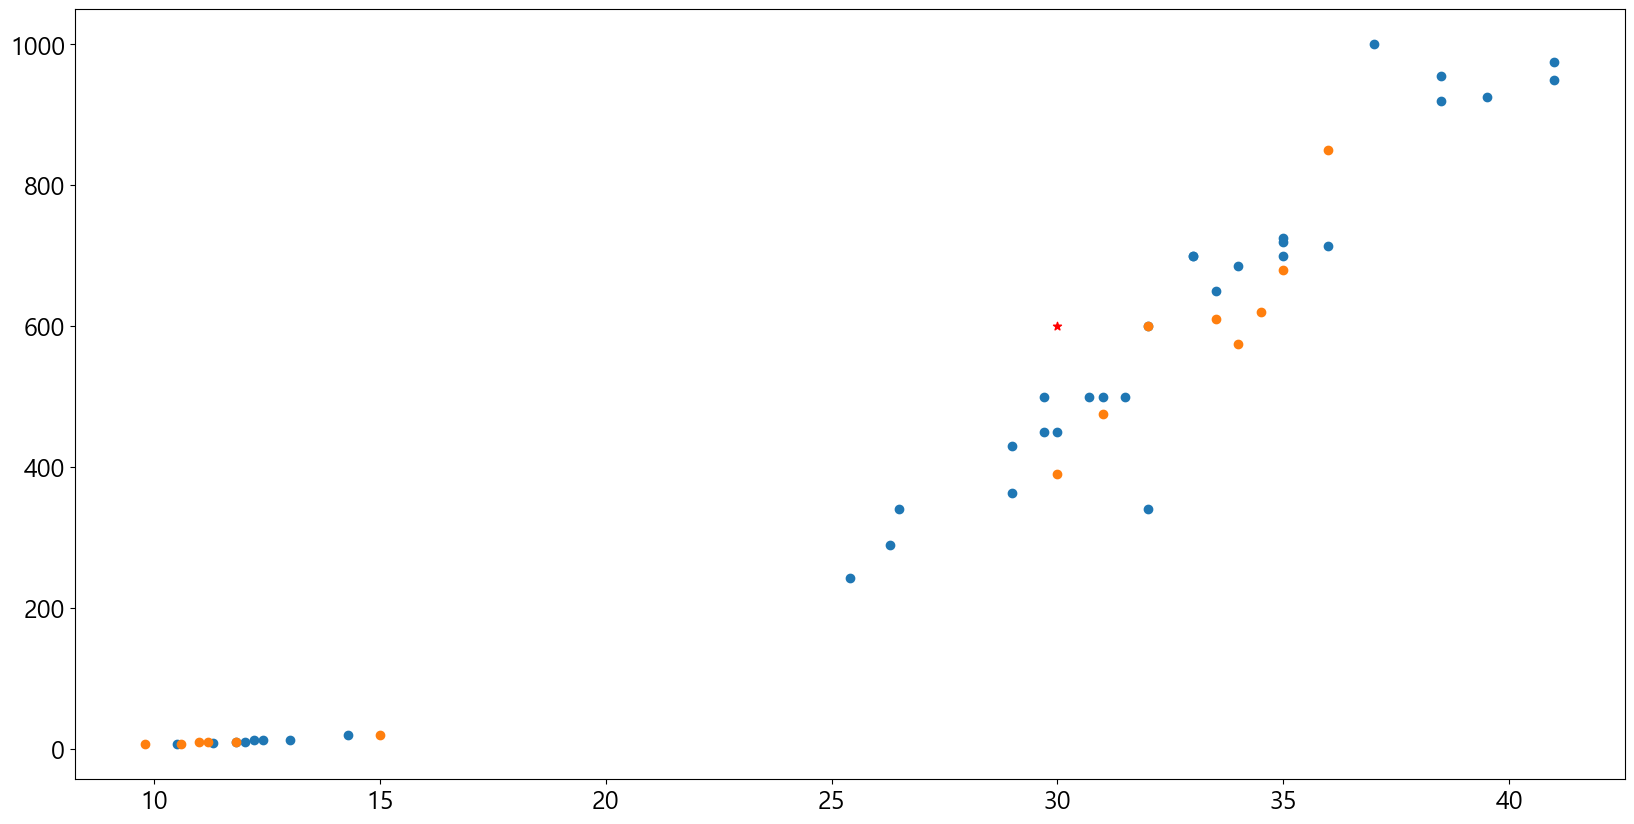

In [62]:
# 시각화를 통해데이터 특징 분포 확인하기 (선형 or 비선형)
fig = plt.figure(figsize=(20,10))
plt.rc('font', family = 'Malgun Gothic', size = 18)

plt.scatter(train_data[:,0],train_data[:,1])
plt.scatter(test_data[:,0],test_data[:,1])
plt.scatter(30, 600, marker='*', c='red')
plt.show()

# 해석
# 파랑색 : 도미
# 주황색 : 빙어
# 도미와 빙어는 길이에 비례해서 무게가 증가하는 것으로 보임
# 다만, 빙어의 경우, 길이에 비례해서 크게 무게가 증가되지는 않는다.
# 빙어는 무게에 비해 길이의 영향을 덜 받는것으로 보인다.

#### sklearn 을 이용해 셔플하기

In [63]:
from sklearn.model_selection import train_test_split

In [104]:
# 디폴트 비율 train : test = 7:3 or 7.5:2.5(대략) 사용
train_input, test_input, train_target, test_target = \
    train_test_split(fish_data, fish_target, test_size=0.25,random_state=42)

In [113]:
print(train_input)
print('------------------------')
print(test_input)
print('------------------------')
print(train_target)
print('------------------------')
print(test_target)

[[  30.   450. ]
 [  29.   363. ]
 [  29.7  500. ]
 [  11.3    8.7]
 [  11.8   10. ]
 [  13.    12.2]
 [  32.   600. ]
 [  30.7  500. ]
 [  33.   700. ]
 [  35.   700. ]
 [  41.   975. ]
 [  38.5  920. ]
 [  25.4  242. ]
 [  12.     9.8]
 [  39.5  925. ]
 [  29.7  450. ]
 [  37.  1000. ]
 [  31.   500. ]
 [  10.5    7.5]
 [  26.3  290. ]
 [  34.   685. ]
 [  26.5  340. ]
 [  10.6    7. ]
 [   9.8    6.7]
 [  35.   680. ]
 [  11.2    9.8]
 [  31.   475. ]
 [  34.5  620. ]
 [  33.5  610. ]
 [  15.    19.9]
 [  34.   575. ]
 [  30.   390. ]
 [  11.8    9.9]
 [  32.   600. ]
 [  36.   850. ]
 [  11.     9.7]]
------------------------
[[ 32.  340. ]
 [ 12.4  13.4]
 [ 14.3  19.7]
 [ 12.2  12.2]
 [ 33.  700. ]
 [ 36.  714. ]
 [ 35.  720. ]
 [ 35.  725. ]
 [ 38.5 955. ]
 [ 33.5 650. ]
 [ 31.5 500. ]
 [ 29.  430. ]
 [ 41.  950. ]]
------------------------
[1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.]
------------------------
[1. 0

In [106]:
# 훈련과 테스트 데이터 구분 비율 확인하기
# 구분 비율은 train_input test_input 비율 체크

In [107]:
round(len(train_input) / len(fish_data) *100 ,2)

73.47

In [108]:
round(len(test_input) / len(fish_data) * 100, 2)

26.53

In [118]:
# 훈련데이터 차원 확인
print(train_input.shape, train_target.shape)

(36, 2) (36,)


In [117]:
# 테스트데이터 차원 확인
print(test_input.shape, test_target.shape)

(13, 2) (13,)


In [132]:
3 / 13

0.23076923076923078

In [133]:
# 정답 데이터(target_data)를 기준으로 비율 설정하여 셔플하기
# 샘플링 편향 최소화 하기
     # - stratify 속성 사용
    # - 속성에는 기준값 사용(보통 종속데이터)
    # - 종속데이터의 분류 값을 기준으로 test_size 비율로 셔플
train_input, test_input, train_target, test_target = \
    train_test_split(fish_data, fish_target, stratify = fish_target,
                     test_size=0.25,random_state=42)

In [134]:
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [230]:
# 훈련데이터 차원 확인
print(train_input.shape, train_target.shape)

(36, 2) (36,)


### 특정 위치의 생선 예측하기
- 특정 위치(산점도)의 생선 : 예측 데이터 1개 사용

In [135]:
# [문제]
# - 생선의 길이와 무게가 25cm, 150g인 생선 분류
# - 산점도 시각화
# - 모델 객체생성 > 훈련데이터 학습 > 정확도 확인 > 예측

In [180]:
nfish = [[25,150]]
nfish[0][0]

25

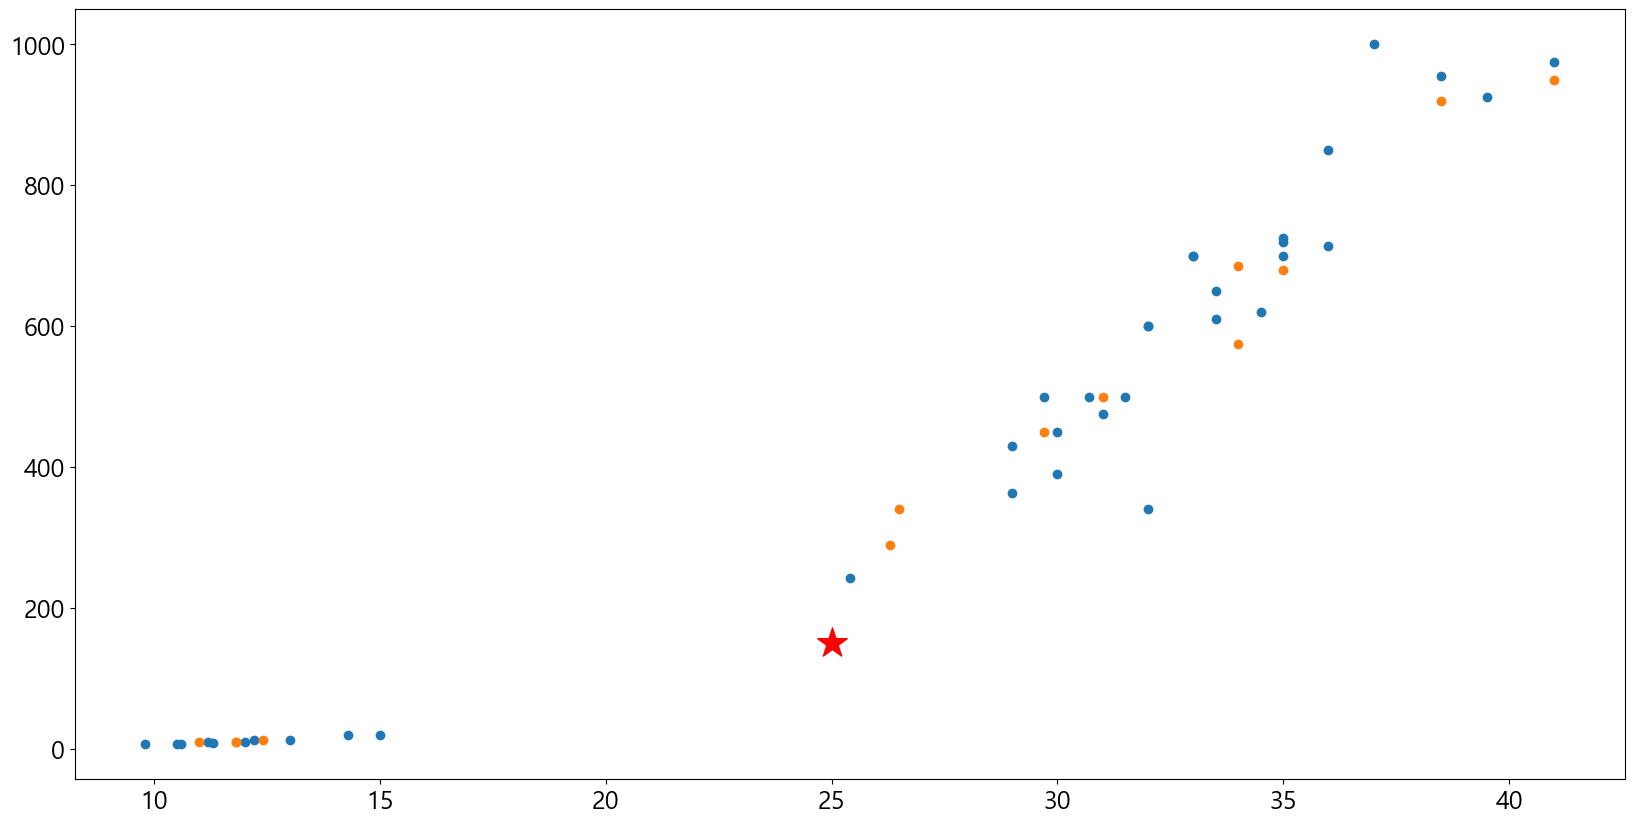

In [182]:
# 시각화를 통해데이터 특징 분포 확인하기 (선형 or 비선형)
fig = plt.figure(figsize=(20,10))
plt.rc('font', family = 'Malgun Gothic', size = 18)

plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.scatter(nfish[0][0], nfish[0][1], marker='*',s=500, c='red')
plt.show()

In [155]:
from sklearn.neighbors import KNeighborsClassifier

In [192]:
kn = KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

In [193]:
kn.predict(nfish)

array([0.])

In [196]:
# 사용된 이웃값 확인하기
# - 모델 생성시 디폴트 n_neighbors=5개
# - n_neighbors 값을 추출하기 위해 kneighbors() 함수 사용
# - 첫번째 값 : n_neighbors의 값
# - 두번째 값 : 첫번째 값의 인덱스 번호
distances, indexes = kn.kneighbors(nfish)
print(distances)
print(indexes)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]


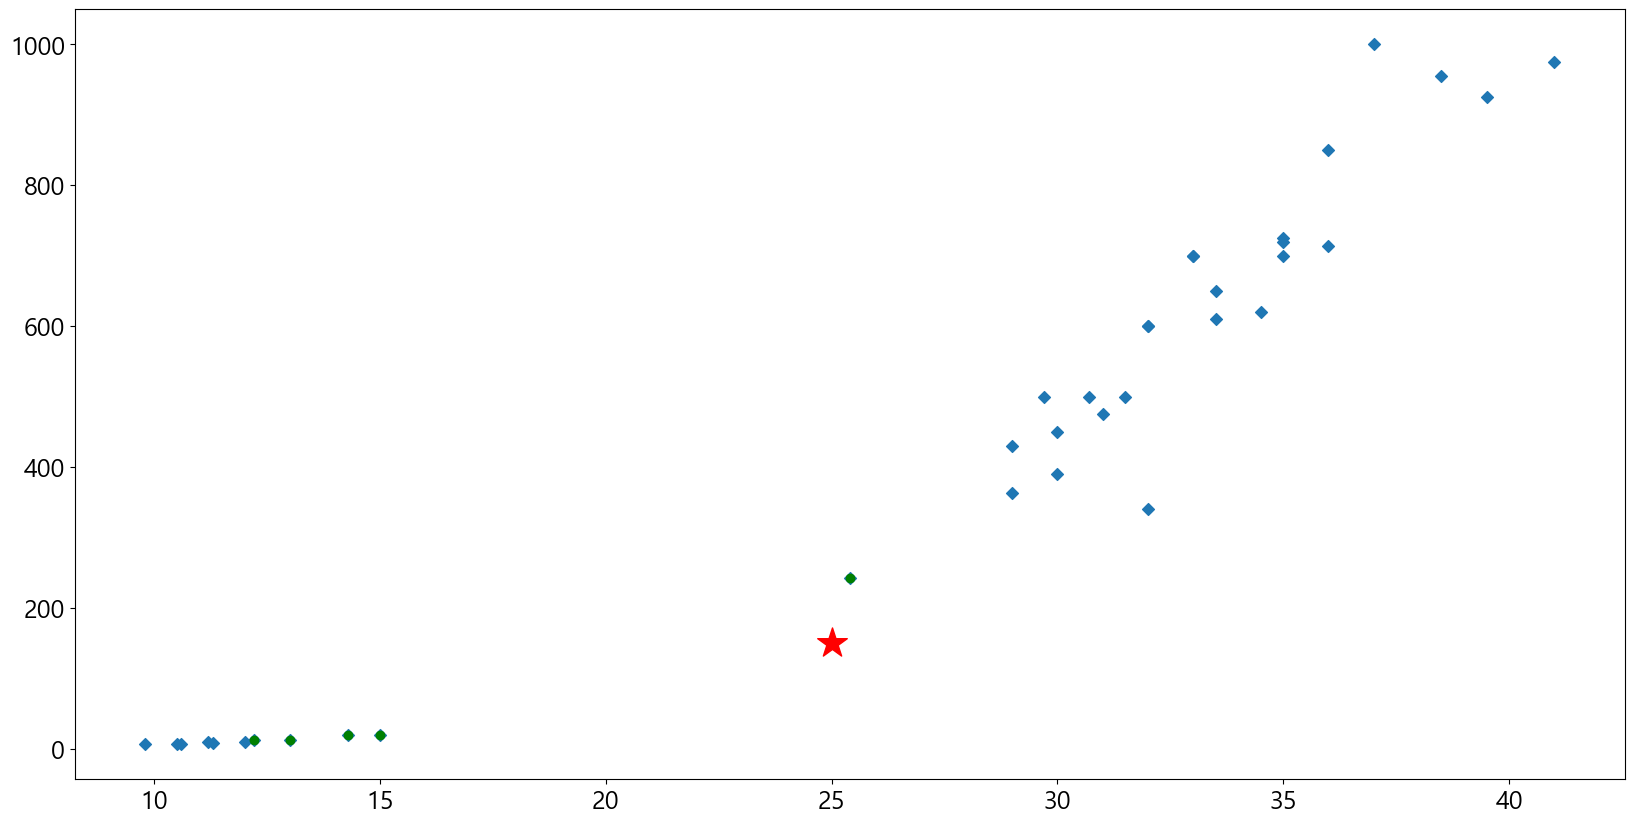

In [229]:
# 시각화를 통해데이터 특징 분포 확인하기 (선형 or 비선형)
fig = plt.figure(figsize=(20,10))
plt.rc('font', family = 'Malgun Gothic', size = 18)

plt.scatter(train_input[:,0],train_input[:,1], marker='D')
plt.scatter(train_input[indexes,0],train_input[indexes,1], marker='o',c='green')
# plt.scatter(test_input[:,0],test_input[:,1])
plt.scatter(nfish[0][0], nfish[0][1], marker='*',s=500, c='red')
plt.show()

In [ ]:
# (해석)
# - x축의 범위와 y축의 범위가 너무 큰 차이
# - x축 : 10~40
# - y축 : 0~1000
# - 두 축의 범위 값이 너무 크게 차이나서 발생
# - y축이 조금만 올라가도 거리는 크게 벌어짐(도미들의 위치가 조금만 올라가도 거리는 크게 벌어진다)

# '스케일이 다르다'
# - 분석시 매우 흔하게 발생하는 현상으로 전처리 필수
# - 전처리 방법 x축, y축의 값을 동일하게 설정

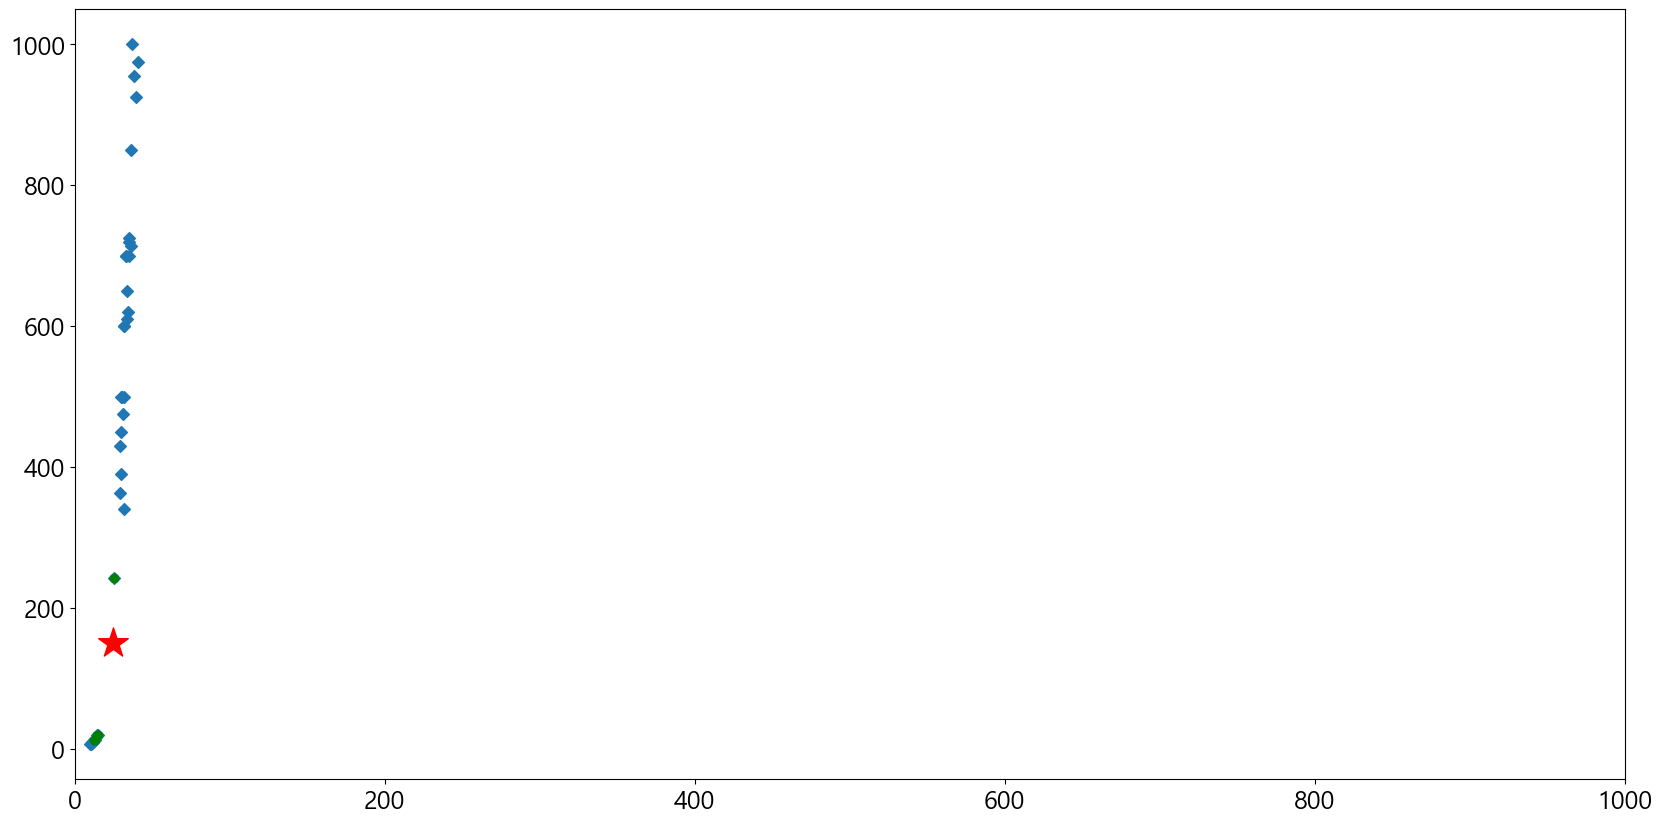

In [232]:
# 시각화를 통해데이터 특징 분포 확인하기 (선형 or 비선형)
fig = plt.figure(figsize=(20,10))
plt.rc('font', family = 'Malgun Gothic', size = 18)

plt.scatter(train_input[:,0],train_input[:,1], marker='D')
plt.scatter(train_input[indexes,0],train_input[indexes,1], marker='o',c='green')
# plt.scatter(test_input[:,0],test_input[:,1])
plt.scatter(nfish[0][0], nfish[0][1], marker='*',s=500, c='red')
plt.xlim((0,1000))
plt.show()

## ★스케일 맞추기(전처리 핵심)
- 표준점수(standard score) 사용
- 표준점수 : 각 데이터가 원점(0)에서 몇 표준편차 만큼 떨어져 있는지
- 표준점수 계산공식 : (각 데이터값-데이터세트 전체 평균값 / 데이터 세트 전체 표준편자값
- 평균, 표준편차 계산 : numpy 사용

In [236]:
# 훈련데이터 전체 평균 구하기
mean = np.mean(train_input, axis=0)
mean

array([ 27.29722222, 454.09722222])

In [238]:
# 훈련데이터 전체 표준편차 구하기
std = np.std(train_input, axis=0)
std

array([  9.98244253, 323.29893931])

In [259]:
# 훈련데이터 표준점수 구하기
train_scaled = (train_input - mean) / std
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

In [271]:
# 테스트 데이터 평균 구하기
test_mean = np.mean(test_input, axis=0)
test_mean

array([ 26.38461538, 417.92307692])

In [272]:
# 테스트 데이터 표준편차 구하기
test_std = np.std(test_input, axis=0)
test_std

array([ 10.52687741, 327.37247465])

In [273]:
# 테스트 데이터 표준점수 구하기
test_scaled = (test_input - test_mean) / test_std
test_scaled

array([[-1.46146049, -1.24696824],
       [-1.38546454, -1.24635731],
       [ 0.31494474,  0.09798296],
       [-1.38546454, -1.24605185],
       [ 0.01096095, -0.23802574],
       [-1.32846758, -1.23566612],
       [ 0.72342294,  0.81581973],
       [ 0.72342294,  0.47981103],
       [ 1.15090013,  1.5336565 ],
       [ 0.81841787,  0.8005466 ],
       [-0.00803803, -0.39075697],
       [ 0.43843815,  0.25071418],
       [ 1.38838746,  1.62529523]])

In [274]:
# 예측데이터(샘플데이터) 표준점수 구하기
nfish_scaled = (nfish - mean) / std
nfish_scaled

array([[-0.23012627, -0.94060693]])

In [305]:
# 스케일 데이터 훈련 및 테스트 하기
kn_scale = KNeighborsClassifier()
kn_scale.fit(train_scaled, train_target)
kn_scale.score(test_scaled, test_target)

1.0

In [306]:
# 스케일 샘플 데이터 예측하기
if kn_scale.predict(nfish_scaled) == 1:
    print('도미')
else :
    print('빙어')

도미


In [310]:
# 사용된 이웃값 확인하기
# - 모델 생성시 디폴트 n_neighbors=5개
# - n_neighbors 값을 추출하기 위해 kneighbors() 함수 사용
# - 첫번째 값 : n_neighbors의 값
# - 두번째 값 : 첫번째 값의 인덱스 번호
distances, indexes = kn_scale.kneighbors(nfish_scaled)
print(distances)
print(indexes)

[[0.2873737  0.7711188  0.89552179 0.91493515 0.95427626]]
[[21 14 34 32  5]]


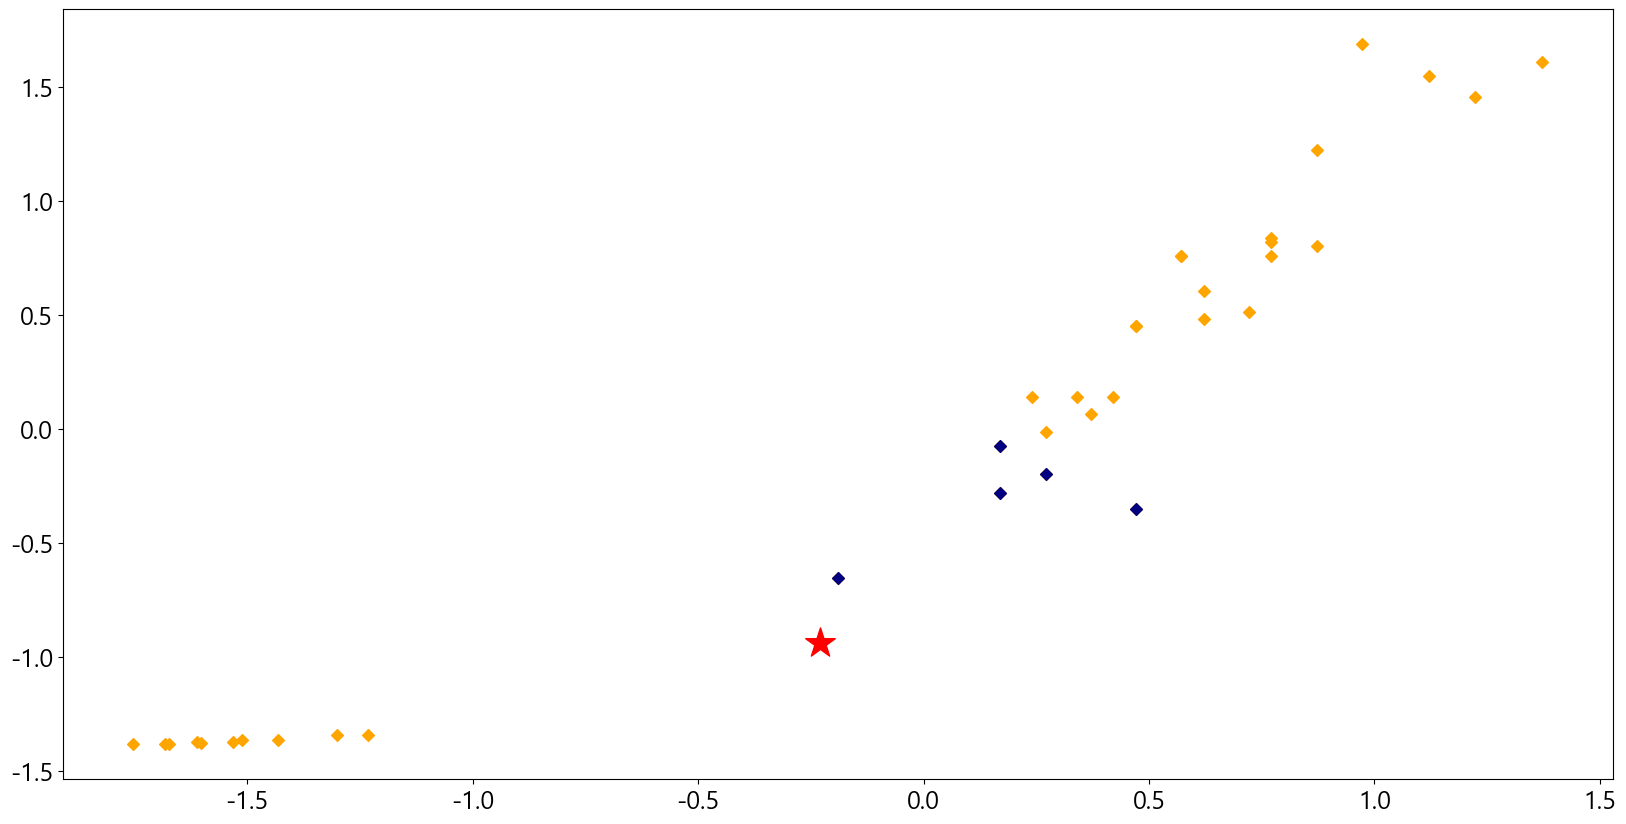

In [317]:
# 시각화를 통해데이터 특징 분포 확인하기 (선형 or 비선형)
fig = plt.figure(figsize=(20,10))
plt.rc('font', family = 'Malgun Gothic', size = 18)

plt.scatter(train_scaled[:,0],train_scaled[:,1], marker='D', c ='orange')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1], marker='D', c='navy')
# plt.scatter(test_scaled[:,0],test_scaled[:,1], c ='navy')
plt.scatter(nfish_scaled[0][0], nfish_scaled[0][1], marker='*',s=500, c='red')
plt.show()

# 훈련데이터 스케일 = 예측데이터 스케일